In [1]:
import pickle
from  matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import os
import numpy as np

In [21]:
dataset_directory = "../dataset/"    
dataset_filename = "datasetk3.p"
# dataset_directory = "generated_inputs/"
# dataset_filename = "small_only_3d_pca.p" 

dataset = pickle.load( open( os.path.join(dataset_directory, dataset_filename), "rb" ) )



In [3]:
%matplotlib qt 
X = dataset['input']
X.shape
# M = dataset['mean']
# imshow(M[2])

plt.ion()
plt.show()

for i in range(10):
    plt.imshow(X[i, 1])
    plt.draw()
    plt.pause(0.01)
    input("Press [enter] to continue.")

KeyboardInterrupt: 

In [1]:
import main
import numpy as np
from importlib import reload
reload(main)
get_batch = main.get_batch

In [6]:
batches = list(map(get_batch, list(range(10))))

finished 1/10
finished 2/10
finished 3/10
finished 4/10
finished 5/10
finished 6/10
finished 7/10
finished 8/10
finished 9/10
finished 10/10


In [12]:
X = np.concatenate([batch[0] for batch in batches])
print(X.shape)
# imshow(X[30,2])
imshow(np.mean(X, 0)[3])

(20, 3, 33, 33)


IndexError: index 3 is out of bounds for axis 0 with size 3

In [30]:
dataset_directory = "generated_inputs"    
dataset_filename = "dataset_w3.p"
# dataset_directory = "generated_inputs/"

# dataset_filename = "small_only_3d_pca.p" 
dataset = pickle.load( open( os.path.join(dataset_directory, dataset_filename), "rb" ) )
dataset.keys()


dict_keys(['inputs', 'mean', 'inv_rot_matrices', 'targets'])

In [32]:
I = dataset['inv_rot_matrices']


In [33]:
X = dataset['inputs']

[-0.37554815 -0.12314669]


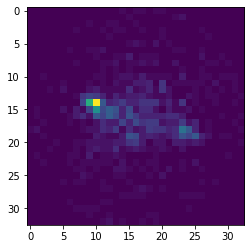

In [44]:
imshow(X[588,0])
print(dataset['targets'][588])

In [34]:
X.shape

(40000, 3, 33, 33)

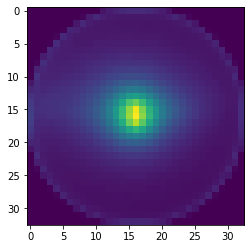

In [48]:
imshow(dataset['mean'][2])

In [49]:
mean = dataset['mean']
with open("mean.npy", "wb") as f:
    np.save(f, mean)



In [ ]:
with open("mean.npy", "rb") as f:
    mean = np.load(f)

In [27]:
dataset['mean'].shape

XM = X - dataset['mean']

In [12]:
imshow(X[0][1])

NameError: name 'X' is not defined

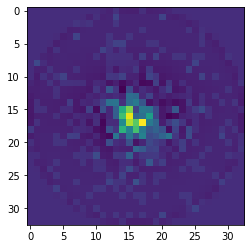

In [32]:
imshow(XM[0][1])

[-0.00981126 -0.04822537]


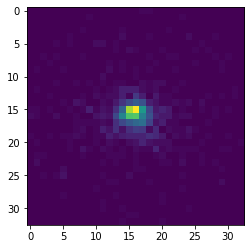

In [17]:
index = 34400
imshow(X[index, 0])
print(dataset['targets'][index])
# imshow(dataset['mean'][0])

In [31]:
dataset['inv_rot_matrices'][0]

array([[[-0.92331297, -0.21502101,  0.3182124 ],
        [-0.04062654,  0.87860956,  0.47580956],
        [ 0.38189351, -0.42639327,  0.81996715]],

       [[-0.92331297, -0.21502101,  0.3182124 ],
        [-0.04062654,  0.87860956,  0.47580956],
        [ 0.38189351, -0.42639327,  0.81996715]],

       [[-0.92331297, -0.21502101,  0.3182124 ],
        [-0.04062654,  0.87860956,  0.47580956],
        [ 0.38189351, -0.42639327,  0.81996715]]])

In [32]:
dataset['targets'][6]

array([-0.21251134,  0.32574553])

(100000, 3, 33, 33)

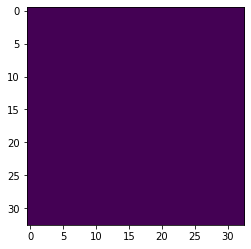

In [7]:
imshow(dataset['input'][39040, 0])
dataset['input'].reshape(100000,33,33,3)

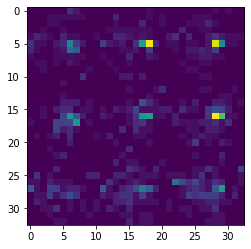

In [13]:
a = dataset['input'][0]
a = a.reshape((33,33,3))
b = np.ones((33,33,3))
a[]
imshow(a[:,:,0])

In [10]:
# max([np.sqrt(a**2 + b**2) for a,b in dataset['targets']])
print(dataset['targets'].shape)
dataset['targets'][39040]

(100000, 2)


array([0., 0.])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

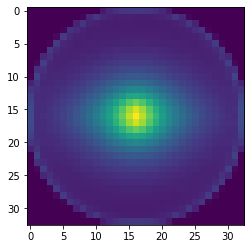

In [9]:
imshow(dataset['mean'][0])
dataset['mean'][0]

In [1]:
import os
import sys 
# sys.path.append(os.getcwd() + "python")
sys.path.append(os.getcwd() + "/python/lib/python")

# Pipeline

In [2]:
# Wojciech Golaszewski

%matplotlib inline
%load_ext autoreload
%autoreload 2

%run mesh_tools.py

from IPython.core.debugger import set_trace
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Helpers


In [8]:
def gen_ellipsoid_point_cloud(a,b,c,n):
    angles = np.random.uniform(0,np.pi,(n, 2)) * [1,2]
    surface_points = np.array([
        [a * np.sin(theta) * np.cos(gamma),
         b * np.sin(theta) * np.sin(gamma),
         c * cos(theta)]
        for theta, gamma in angles
    ])
#     distances = np.random.uniform(0,1,(n, 1))
#     point_cloud = np.array(surface_points * distances)
    return surface_points

def get_pca_axis(points):
    pca = PCA(n_components=3)
    pca.fit(points)
    return pca.components_.T
    
def test_pca_rect():
    rect = np.random.uniform(-0.5,0.5,(1000, 3)) * [1,2,5] * 0.6
    r = Rotation.random(random_state=1234).as_matrix()
    rect = (r @ rect.T).T 
    pcar = get_pca_axis(rect)
    axr = rotate_trimesh(axis_mesh.copy(), pcar)


    pymesh = pyrender.Mesh.from_points(rect)
    axmesh = pyrender.Mesh.from_trimesh(axis_mesh)
    axrmesh = pyrender.Mesh.from_trimesh(axr)
    run_gui_pyrmesh([pymesh, axrmesh], point_size=5)
    
def test_pca_ellipsoid():
    axis_mesh = get_axis_trimesh(thickness = 1)
    ell = gen_ellipsoid_point_cloud(3,5,7, 1000) * 0.2
    r = Rotation.random(random_state=1234).as_matrix()

    ell = (r @ ell.T).T 

    space = 3

    ellr = (r @ ell.T).T + [space, 0, 0]
    axis_meshr = axis_mesh.copy() \
        .apply_rotation(r).apply_translation([space,0,0])

    pca_comp = get_pca_axis(ell)
    ell_t = (pca_comp.T @ ell.T).T + [space, 0, 0]
    # axis_meshrpca = axis_mesh.copy() \
        # .apply_rotation(pca_comp).apply_translation([space, 0,0])
    axis_mesh_tran = axis_mesh.copy().apply_translation([space,0,0])
    colors = np.array([1,0.7,0.1] * len(ell)).reshape(ell.shape)
    # pyrender.

    run_gui_pyrmesh([
        pyrender.Mesh.from_points(ell),
        pyrender.Mesh.from_trimesh(axis_mesh),
    #     pyrender.Mesh.from_points(ellr),
    #     pyrender.Mesh.from_trimesh(axis_meshr),
        pyrender.Mesh.from_points(ell_t, colors=colors),
        pyrender.Mesh.from_trimesh(axis_mesh_tran),
    ], point_size=6)

In [9]:
test_pca_ellipsoid()

## Visualisers

In [7]:
def visualise_valid_points(points, valid_point_indices):
    colors = np.ones_like(points)
    colors[valid_point_indices] = [1, 0.3, 0.1]
    
    axis_mesh = get_axis_trimesh(thickness = 1)
    pymesh = pyrender.Mesh.from_points(points, colors=colors)
    axmesh = pyrender.Mesh.from_trimesh(axis_mesh)
    run_gui_pyrmesh([pymesh, axmesh], point_size=12)

## Code

In [4]:
def load_point_cloud(file_path):
    lines  = open(file_path).read().split("\n")[:-1]
    point_cloud = np.array([
        [float(x) for x in line.split(" ")[:3]]
        for line in lines
    ])
    return point_cloud

def get_points_close_to_origin(point_cloud, max_dst=0.02):
    return np.array([
        i for i, point in enumerate(point_cloud)
        if np.linalg.norm(point) < max_dst**0.5])

def get_pca_axis_3d(point_cloud):
    pca = PCA(n_components=3)
    pca.fit(point_cloud)
    return pca.components_

def rotate_point_cloud(point_cloud, rot_matrix):
    return np.array((rot_matrix @ point_cloud.T).T)

In [5]:
point_cloud = load_point_cloud("../3dmodels/model_256.xyz")
valid_points = get_points_close_to_origin(point_cloud)


In [6]:
visualise_valid_points(point_cloud, valid_points)

In [1]:
from hough_estimator import HoughEstimator as HE


# he = HE("../3dmodels/model")
from mesh_generator import generate_point_cloud

In [2]:
p1 = generate_point_cloud(90, 0)
run_gui_pyrmesh([
    pyrender.Mesh.from_points(p1[:, :3]),
], point_size=6)


NameError: name 'run_gui_pyrmesh' is not defined

In [12]:
import numpy as np
a = np.ones((3,2,2))
b = [[1,2],[3,4]]
a * b
np.max()

array([[[1., 2.],
        [3., 4.]],

       [[1., 2.],
        [3., 4.]],

       [[1., 2.],
        [3., 4.]]])

In [72]:
import numpy as numpy
angle = np.random.rand() * (160 - 80) + 80
noise_factor = (
    np.random.rand() * (2 - 0) + 0
)

print(angle, noise_factor)

125.10435659678075 1.1798859565754922
